In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donnee

In [28]:
# sert a charger le fichier csv de base
df = pd.read_csv('project_dataset.csv', sep=';')

print("taille du dataset:", df.shape)
df.head()

taille du dataset: (12070, 26)


,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,870,5.0,NaN,289.0,11.24780854,...,110.0,6.51,44.0,8.0,36.13445378,31.09243697,10.92436975,15.96638655,"5,04",0.840336134
1,2018-01,National,LE MANS,PARIS MONTPARNASSE,56.0,406.0,1.0,NaN,213.0,8.479968701,...,32.0,5.363539095,9.0,4.0,20.0,35.0,16.66666667,16.66666667,8.333333333,3.333333333
2,2018-01,National,PARIS MONTPARNASSE,LA ROCHELLE VILLE,166.0,226.0,0.0,NaN,21.0,6.23968254,...,11.0,2.938053097,6.0,1.0,22.22222222,27.77777778,16.66666667,16.66666667,5.555555556,11.11111111
3,2018-01,National,PARIS MONTPARNASSE,NANTES,216.21,508.0,3.0,NaN,71.0,7.235211268,...,39.0,5.292211221,18.0,NaN,33.33333333,22.22222222,16.66666667,20.37037037,5.555555556,1.851851852
4,2018-01,National,POITIERS,PARIS MONTPARNASSE,94.0,472.0,4.0,NaN,224.0,6.784672619,...,42.0,4.882371795,10.0,0.0,15.78947368,45.61403509,NaN,15.78947368,1.754385965,1.754385965


In [29]:
# voir les colonnes
print("colonnes:")
for col in df.columns:
    print(f" - {col}")

colonnes:
 - Date
 - Service
 - Gare de départ
 - Gare d'arrivée
 - Durée moyenne du trajet
 - Nombre de circulations prévues
 - Nombre de trains annulés
 - Commentaire annulations
 - Nombre de trains en retard au départ
 - Retard moyen des trains en retard au départ
 - Retard moyen de tous les trains au départ
 - Commentaire retards au départ
 - Nombre de trains en retard à l'arrivée
 - Retard moyen des trains en retard à l'arrivée
 - Retard moyen de tous les trains à l'arrivée
 - Commentaire retards à l'arrivée
 - Nombre trains en retard > 15min
 - Retard moyen trains en retard > 15 (si liaison concurrencée par vol)
 - Nombre trains en retard > 30min
 - Nombre trains en retard > 60min
 - Prct retard pour causes externes
 - Prct retard pour cause infrastructure
 - Prct retard pour cause gestion trafic
 - Prct retard pour cause matériel roulant
 - Prct retard pour cause gestion en gare et réutilisation de matériel
 - Prct retard pour cause prise en compte voyageurs (affluence, gestions

# inspecter les donnee

In [30]:
# donner les info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12070 entries, 0 to 12069
Data columns (total 26 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Date                                                                                         12010 non-null  object
 1   Service                                                                                      11830 non-null  object
 2   Gare de départ                                                                               12011 non-null  object
 3   Gare d'arrivée                                                                               12011 non-null  object
 4   Durée moyenne du trajet                                                                      11830 non-null  object
 5   Nombre de circulations prévues         

In [31]:
#permet de compter les valeur manquante
print("valeur manquante par colonnes :")
manquante = df.isnull().sum()
print(manquante[manquante > 0 ])

valeur manquante par colonnes :
Date                                                                                              60
Service                                                                                          240
Gare de départ                                                                                    59
Gare d'arrivée                                                                                    59
Durée moyenne du trajet                                                                          240
Nombre de circulations prévues                                                                   240
Nombre de trains annulés                                                                         239
Commentaire annulations                                                                        11493
Nombre de trains en retard au départ                                                             240
Retard moyen des trains en retard au départ                

In [32]:
#verifier les doublons

nb_doublons = df.duplicated().sum()
print(f"combre de doublons : {nb_doublons}")

combre de doublons : 174


# nettoyage des donnee

In [33]:
#supprime les doublons
if nb_doublons > 0:
    df = df.drop_duplicates()
    print(f"supprimer les ligne double: {df.shape}")

supprimer les ligne double: (11896, 26)


In [34]:
#supprime les ligne vide
df = df.dropna(how='all')
print(f"suprimer les ligne vide: {df.shape}")

suprimer les ligne vide: (11896, 26)


# feature engineering

extraire les mois et l'annee dans la colonne 

In [35]:
# Transformation de la colonne date (txt) en vrai date pythonù

df["Date_parsed"] = pd.to_datetime(df["Date"],format="%Y-%m", errors="coerce")

# extraire les mois et les annee 

df['month'] = df['Date_parsed'].dt.month
df['year'] = df['Date_parsed'].dt.year

print("Exemples:")
print(df[['Date', 'month', 'year']].head())


Exemples:
      Date  month    year
0  2018-01    1.0  2018.0
1  2018-01    1.0  2018.0
2  2018-01    1.0  2018.0
3  2018-01    1.0  2018.0
4  2018-01    1.0  2018.0


# statistique

In [36]:
# statistique colonne retard

print("Stats sur les retards moyens à l'arrivée:")
print(df['Retard moyen de tous les trains à l\'arrivée'].describe())

Stats sur les retards moyens à l'arrivée:
count     11660
unique    11398
top         0.0
freq        124
Name: Retard moyen de tous les trains à l'arrivée, dtype: object


In [37]:
#type de train

print("Types de trains:")
print(df['Service'].value_counts())

Types de trains:
Service
National         10217
International     1439
Name: count, dtype: int64


In [38]:
# top 10 gare frequenter

print("Top 10 gares de départ:")
print(df['Gare de départ'].value_counts().head(10))

Top 10 gares de départ:
Gare de départ
PARIS LYON              2376
PARIS MONTPARNASSE      1520
LYON PART DIEU           574
PARIS EST                574
MARSEILLE ST CHARLES     513
PARIS NORD               375
LILLE                    286
NANTES                   209
BORDEAUX ST JEAN         205
RENNES                   205
Name: count, dtype: int64


# visualisation

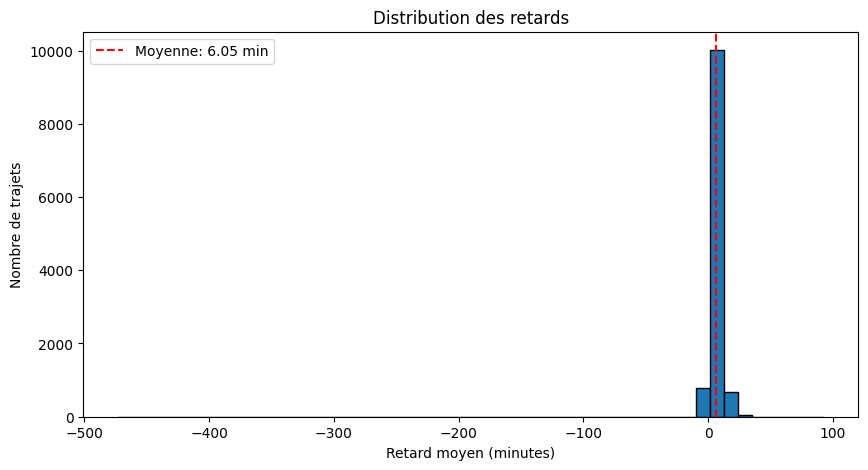

In [ ]:
# retard moyen
df["Retard moyen de tous les trains à l'arrivée"] = pd.to_numeric(
    df["Retard moyen de tous les trains à l'arrivée"], 
    errors='coerce'  # Remplace les valeurs non-convertibles par NaN
)


plt.figure(figsize=(10, 5))
retards = df["Retard moyen de tous les trains à l'arrivée"].dropna()

plt.hist(retards, bins=50, edgecolor='black')
plt.xlabel('Retard moyen (minutes)')
plt.ylabel('Nombre de trajets')
plt.title('Distribution des retards')

plt.axvline(retards.mean(), color='red', linestyle='--', label=f'Moyenne: {retards.mean():.2f} min')
plt.legend()
plt.show()

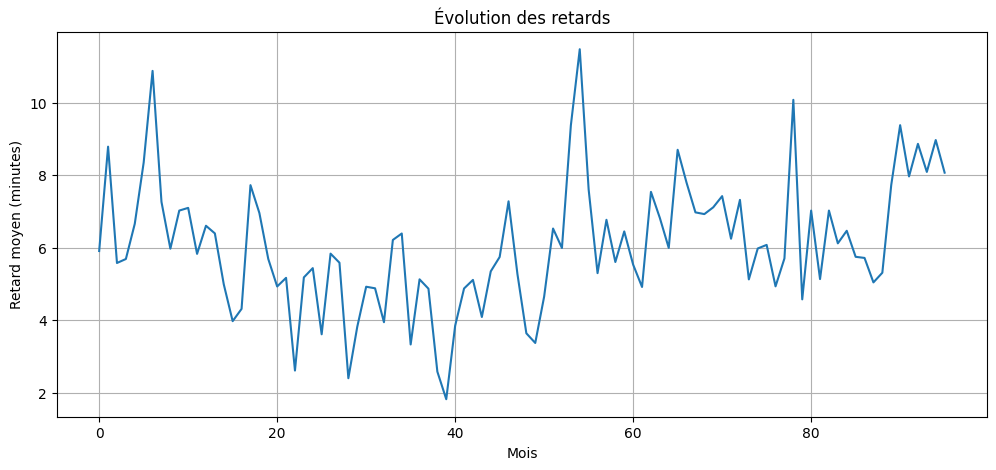

In [40]:
# calculer le retard moyen moyen par ans /mois
retards_par_date = df.groupby(['year', 'month'])['Retard moyen de tous les trains à l\'arrivée'].mean()
 
# faire le graphique
plt.figure(figsize=(12, 5))
plt.plot(retards_par_date.values)
plt.xlabel('Mois')
plt.ylabel('Retard moyen (minutes)')
plt.title('Évolution des retards')
plt.grid(True)
plt.show()

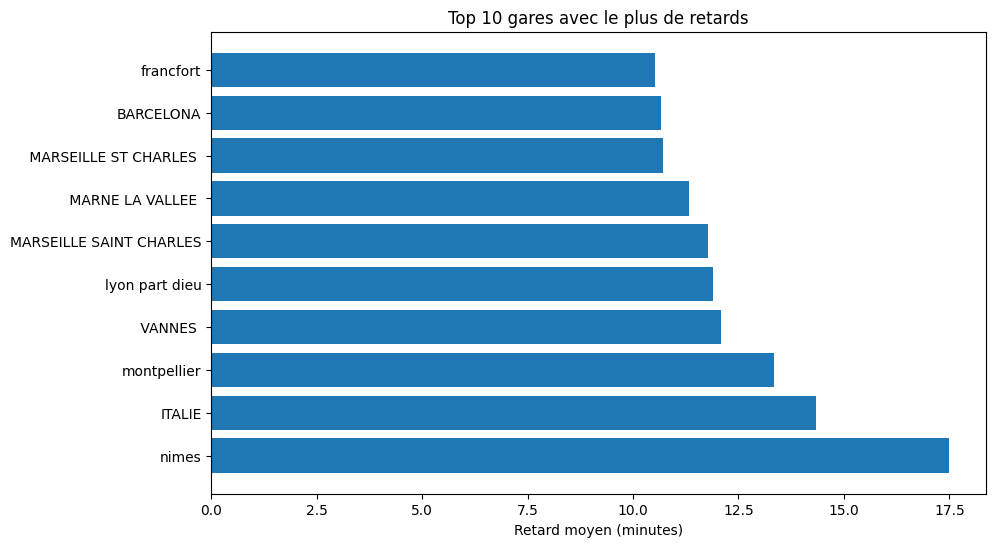

In [41]:

# calculer le retard moyen par gare
retards_gares = df.groupby('Gare de départ')['Retard moyen de tous les trains à l\'arrivée'].mean()
 
# trier et prendre les 10 premieres
top10_gares = retards_gares.sort_values(ascending=False).head(10)
 
# faire le graphique
plt.figure(figsize=(10, 6))
plt.barh(top10_gares.index, top10_gares.values)
plt.xlabel('Retard moyen (minutes)')
plt.title('Top 10 gares avec le plus de retards')
plt.show()

# sauvegarde du dataset

In [42]:
# sauvegarde le data set

df.to_csv('cleaned_dataset.csv', index=False)
print(f"dataset sauvegarder: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("fichier : cleaned_dataset.csv")

dataset sauvegarder: 11896 lignes, 29 colonnes
fichier : cleaned_dataset.csv


## Résumé
 
### Ce qu'on a fait
- Chargé les données brutes (14000+ lignes)
- Supprimé les doublons et lignes vides
- Créé des features : month, year
- Fait des visualisations pour comprendre les données
- Sauvegardé le dataset nettoyé
 
### Observations
- Les retards varient selon les mois (probablement météo/saisons)
- Certaines gares ont plus de retards que d'autres
- La plupart des retards sont entre 0 et 30 minutes
- Il y a quelques retards extrêmes (>60 minutes)
 
Le dataset est prêt pour la modélisation !